In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
current_path = '/content/drive/MyDrive/flowers'
img_size = 224
batch = 64

In [4]:
data_train = ImageDataGenerator(rescale=1. / 255, validation_split=0.2, horizontal_flip=True, shear_range=0.2,
                                   zoom_range=0.2)

data_test = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.2)

In [5]:
data_train = data_train.flow_from_directory(current_path,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch,
                                                  subset='training')
data_test = data_test.flow_from_directory(current_path,
                                                target_size=(img_size, img_size),
                                                batch_size=batch,
                                                subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [6]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs=20
results = model.fit(data_train,epochs=epochs,validation_data=data_test)


Epoch 1/20


55/55 [==============================] - 149s 3s/step - loss: 1.3639 - accuracy: 0.3870 - val_loss: 1.1882 - val_accuracy: 0.5093
Epoch 2/20
55/55 [==============================] - 149s 3s/step - loss: 1.1117 - accuracy: 0.5638 - val_loss: 1.2822 - val_accuracy: 0.5070
Epoch 3/20
55/55 [==============================] - 144s 3s/step - loss: 1.0670 - accuracy: 0.5887 - val_loss: 0.9325 - val_accuracy: 0.6314
Epoch 4/20
55/55 [==============================] - 142s 3s/step - loss: 0.9014 - accuracy: 0.6506 - val_loss: 0.9795 - val_accuracy: 0.6395
Epoch 5/20
55/55 [==============================] - 145s 3s/step - loss: 0.8751 - accuracy: 0.6581 - val_loss: 0.8906 - val_accuracy: 0.6547
Epoch 6/20
55/55 [==============================] - 144s 3s/step - loss: 0.7806 - accuracy: 0.6957 - val_loss: 0.8719 - val_accuracy: 0.6686
Epoch 7/20
55/55 [==============================] - 166s 3s/step - loss: 0.7422 - accuracy: 0.7206 - val_loss: 0.8277 - val_accuracy: 0.6733
Epoch 8/20


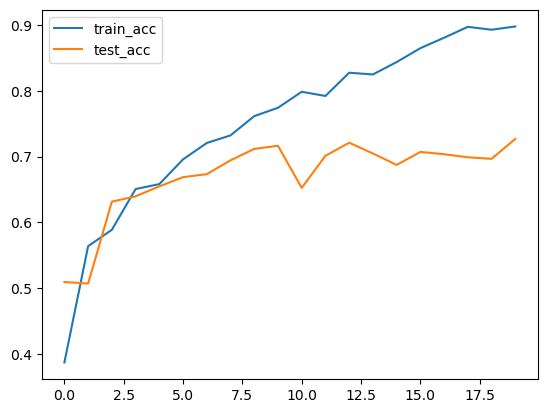

In [10]:
plt.plot(results.history['accuracy'], label='train_acc')
plt.plot(results.history['val_accuracy'], label='test_acc')
plt.legend()
plt.show()

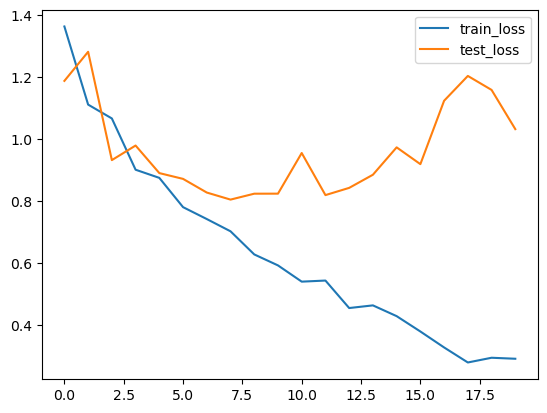

In [11]:
plt.plot(results.history['loss'], label='train_loss')
plt.plot(results.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [12]:
model.save('Flowers.h5')

# load model
flower_Model=load_model('Flowers.h5')

In [13]:
data_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 34ms/step
[[0. 0. 1. 0. 0.]]
Rose


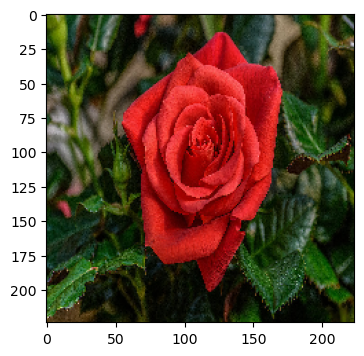

1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 1. 0.]]
sunflower


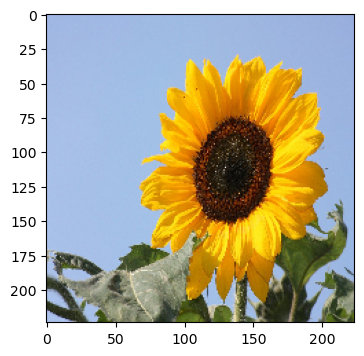

1/1 [==============================] - 0s 39ms/step
[[0. 1. 0. 0. 0.]]
Danelion


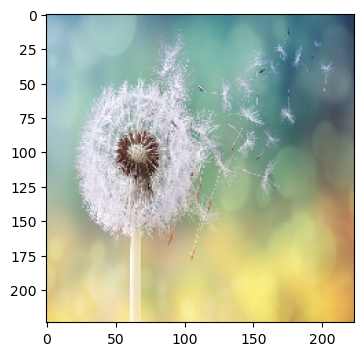

1/1 [==============================] - 0s 36ms/step
[[0. 0. 0. 0. 1.]]
tulip


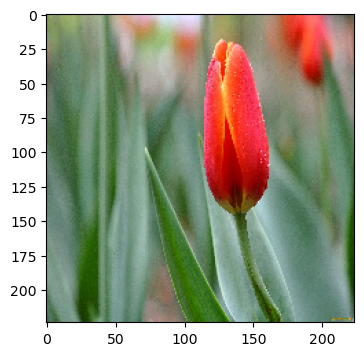

1/1 [==============================] - 0s 34ms/step
[[1. 0. 0. 0. 0.]]
Daisy


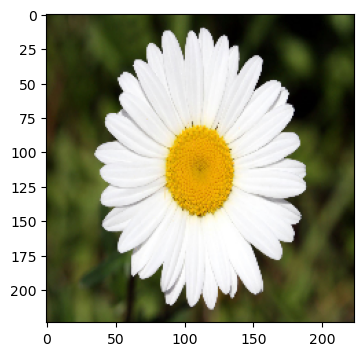

In [20]:
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

test_images= ['/content/drive/MyDrive/exp1.jpg','/content/drive/MyDrive/exp2.jpg',
              '/content/drive/MyDrive/exp3.jpg','/content/drive/MyDrive/exp4.jpg','/content/drive/MyDrive/exp5.jpg']

j=0
for j in range(len(test_images)):
  test_image = image.load_img(test_images[j],target_size=(224,224))
  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot()
  ax.imshow(test_image)

  #plt.imshow(test_images[j])
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image,axis=0)

  result = flower_Model.predict(test_image)
  print(result)

  i=0
  for i in range(len(result[0])):
    if(result[0][i]==1):
	    print(list_[i])
  plt.show()